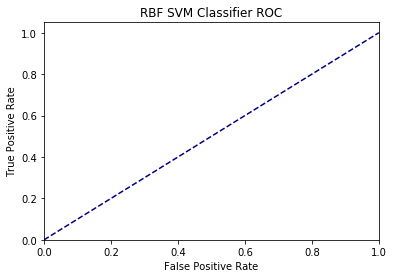

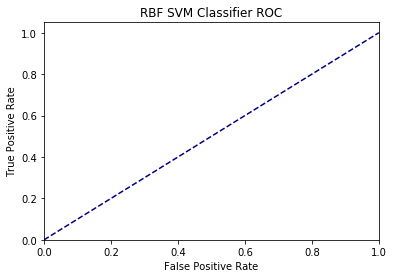

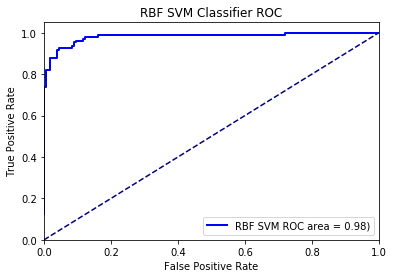

In [3]:
import numpy as np
from sklearn import svm, model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import read_clean
import cvKernel
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score

def bootstrapping_for_tuning(B, X_subset, y_subset, C, gamma):
    n = len(X_subset)
    bs_err = np.zeros(B)
    for b in range(B):
        train_samples = list(np.random.randint(0, n, n))
        test_samples = list(set(range(n)) - set(train_samples))
        # print np.unique(y_subset)
        alg = svm.SVC(kernel = 'rbf', gamma = gamma, C = C)
        alg.fit(X_subset[train_samples], y_subset[train_samples])
        bs_err[b] = np.mean(y_subset[test_samples] != alg.predict(X_subset[test_samples]))
    err = np.mean(bs_err)
    return err

###############################################
# Using the scikit learn svm package to create an rbf kernel svm
###############################################

X, y = read_clean.getCleanedData("data.csv")

#choosing a good gamma and C to use - parameter tuning from GridSearchCV
# grid_search = GridSearchCV(svm.SVC(kernel = 'rbf'), {'C': [100, 1000, 10000, 100000], 'gamma': [0.00001, 0.0001, 0.001, 0.01]}, cv=10)
# grid_search.fit(X, y)
# print grid_search.best_params_

#hyperparameter tuning with cross validation (2-fold)
positive_samples = list(np.where(y==1)[0])
negative_samples = list(np.where(y==-1)[0])

# # print positive_samples
# # print negative_samples

# samples_in_fold1 = positive_samples[0:len(positive_samples)/2] + negative_samples[0:len(negative_samples)/2]
# samples_in_fold2 = positive_samples[len(positive_samples)/2:] + negative_samples[len(negative_samples)/2:]

# # print samples_in_fold1
# # print samples_in_fold2

# C_list = [100000, 1000000, 10000000, 100000000]
# gamma_list = [0.00000001,0.0000001, 0.000001, 0.00001]
# B = 30

# y_pred = np.zeros(len(X))

# best_err = 1.1
# best_C = 0.0
# best_gamma = 0.0
# for C in C_list:
#     err = bootstrapping_for_tuning(B, X[samples_in_fold1], y[samples_in_fold1], C, 0.1)
#     print "C=", C, ", err=", err
#     if err < best_err:
#         best_err = err
#         best_C = C

# print "best_C=", best_C

# for gamma in gamma_list:
#     err = bootstrapping_for_tuning(B, X[samples_in_fold1], y[samples_in_fold1], best_C, gamma)
#     print "gamma=", gamma, ", err=", err
#     if err < best_err:
#         best_err = err
#         best_gamma = gamma

# print "best_gamma=", best_gamma

# alg = svm.SVC(kernel = 'rbf', gamma = best_gamma, C = best_C)
# alg.fit(X[samples_in_fold1], y[samples_in_fold1])
# y_pred[samples_in_fold2] = alg.predict(X[samples_in_fold2])

# best_err = 1.1
# best_C = 0.0
# best_gamma = 0.0
# for C in C_list:
#     err = bootstrapping_for_tuning(B, X[samples_in_fold2], y[samples_in_fold2], C, 0.1)
#     print "C=", C, ", err=", err
#     if err < best_err:
#         best_err = err
#         best_C = C

# print "best_C=", best_C

# for gamma in gamma_list:
#     err = bootstrapping_for_tuning(B, X[samples_in_fold2], y[samples_in_fold2], best_C, gamma)
#     print "gamma=", gamma, ", err=", err
#     if err < best_err:
#         best_err = err
#         best_gamma = gamma

# print "best_gamma=", best_gamma

# alg = svm.SVC(kernel = 'rbf', gamma = best_gamma, C = best_C)
# alg.fit(X[samples_in_fold2], y[samples_in_fold2])
# y_pred[samples_in_fold1] = alg.predict(X[samples_in_fold1])

# err = np.mean(y!=y_pred)
# print "Hyperparameter tuning err=", err

# ##############################################
# # bootstrapping for 5, 10, and 20
# ##############################################
best_C = 1000000
best_gamma = 0.000001

# print "bootstrapping err for 5= ", bootstrapping_for_tuning(5, X, y, best_C, best_gamma)
# print "bootstrapping err for 10= ", bootstrapping_for_tuning(10, X, y, best_C, best_gamma)
# print "bootstrapping err for 20= ", bootstrapping_for_tuning(20, X, y, best_C, best_gamma)

# ##############################################
# # k-fold cross validation
# ##############################################

# #LOOCV
# n = len(X)
# d = len(X[0])

# y_pred = np.zeros(n)
# X, y = read_clean.getCleanedData("data.csv")
# y = [0 if x == -1 else x for x in y]

# for i in range(n):
#     range_except_i = range(i) + range(i+1, n)

#     X, y = read_clean.getCleanedData("data.csv")
#     y = [0 if x == -1 else x for x in y]

#     X_train = X[range_except_i]
#     y_train = [y[t] for t in range_except_i]

#     rbf_svc = svm.SVC(kernel = 'rbf', gamma = best_gamma, C = best_C)   #should modify hyperparams to test - see above gridsearch for finding best params
#     rbf_svc.fit(X, y)

#     y_pred[i] = rbf_svc.predict(X[i].reshape(1, -1))

# err = np.mean(y!=y_pred)
# # print np.shape(y)
# # print np.shape(y_pred)
# print "LOOCV err=", err

# #run     with values of 5 and 10 here

#visualizing the data
samples_in_fold1 = positive_samples[0:len(positive_samples)/2] + negative_samples[0:len(negative_samples)/2]
samples_in_fold2 = positive_samples[len(positive_samples)/2:] + negative_samples[len(negative_samples)/2:]
trainX = X[samples_in_fold1]
trainY = y[samples_in_fold1]
testX = X[samples_in_fold2]
testY = y[samples_in_fold2]

alg = svm.SVC(kernel = 'rbf', gamma = best_gamma, C = best_C, probability = True)
alg.fit(trainX, trainY)

probs = alg.predict_proba(testX)
probs = probs[:, 1]

fpr, tpr, thresholds = roc_curve(testY, probs)
auc = roc_auc_score(testY, probs)

plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('RBF SVM Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='RBF SVM ROC area = %0.2f)' % auc)
plt.legend(loc="lower right")
plt.show()
